<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Multiple Linear Regression Lab 5 : House Prices

### Overview
Estimate house prices using MLR

### Builds on
None

### Run time
approx. 20 minutes

### Notes



In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


## Step 1 : House data

In [3]:
housePrices = pd.read_csv("https://s3.amazonaws.com/elephantscale-public/data/house-prices/house-sales-full.csv")
housePrices

,DocumentID,Date,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,1,9/16/14,280000,1000102,Multiplex,9/1/14,405100,0.930836,300805.0,2,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2,6/16/06,1000000,1200013,Single Family,6/1/06,404400,0.929228,1076162.0,1,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,3,1/29/07,745000,1200019,Single Family,1/1/07,425600,0.977941,761805.0,1,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,4,2/25/08,425000,2800016,Single Family,2/1/08,418400,0.961397,442065.0,1,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,5,3/29/13,240000,2800024,Single Family,3/1/13,351600,0.807904,297065.0,1,...,1.75,4,7,1948,0,0,104000,205000,98168,False
5,6,3/30/09,349900,3600090,Townhouse,3/1/09,369800,0.849724,411781.0,1,...,1.50,2,8,2008,0,0,170000,207000,98144,True
6,7,8/28/13,327500,3800004,Single Family,8/1/13,374300,0.860064,380785.0,1,...,1.50,3,8,1961,0,0,165000,227000,98178,False
7,8,5/24/07,347000,3800009,Single Family,5/1/07,432100,0.992877,349489.0,1,...,1.75,4,7,1963,0,0,115000,154000,98178,False
8,9,9/22/06,220400,6600055,Single Family,9/1/06,414800,0.953125,231239.0,1,...,1.00,2,6,1930,0,3,90000,75000,98032,False
9,10,8/22/06,437500,7200080,Multiplex,8/1/06,411100,0.944623,463148.0,2,...,2.00,4,6,1924,0,0,124000,116000,98055,False


Wow! That's a lot of columns.  Maybe we should foucs on just a few of them.

**=> Select only "SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot" **

In [4]:
housePrices.columns

Index(['DocumentID', 'Date', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [5]:
# TODO: select only "SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"
housePrices_small = housePrices[["SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"]]


housePrices_small

,SalePrice,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot
0,280000,6,3.00,2400,9373
1,1000000,4,3.75,3764,20156
2,745000,4,1.75,2060,26036
3,425000,5,3.75,3200,8618
4,240000,4,1.75,1720,8620
5,349900,2,1.50,930,1012
6,327500,3,1.50,1750,34465
7,347000,4,1.75,1860,14659
8,220400,2,1.00,990,5324
9,437500,4,2.00,1980,10585


## Step 2: Create Features and Label Column in Dataframe

We will create our "features" column, which is of type vector, and our label column, for which we can just reuse the SquareFootage column.

**=> Build features with  "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot" **

**=> Rename SalePrice as "label" **



In [6]:
from sklearn.model_selection import train_test_split
y = housePrices_small[["SalePrice"]]
df = housePrices_small[["Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"]]
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [7]:
X_test.shape

(5413, 4)

In [8]:
y_test.shape

(5413, 1)

In [9]:
X_test

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot
11302,3,2.00,1790,8468
10322,4,2.50,2380,8942
9890,3,1.00,1540,4000
9590,5,2.75,2950,7200
12148,2,2.25,1760,3035
17924,2,1.00,980,4080
13193,3,2.00,1320,3150
26639,4,4.25,3280,2480
20646,3,1.75,2000,4042
16071,4,2.75,1830,6643


##  Step 3: Run the Linear Regression Model

**=> Run model with max iterations as 10, regParam=0.3, elasticNetParam=0.8 **


In [10]:
## Step 3: Run the Linear Regression Model
lr = LinearRegression()
lrModel = lr.fit(X_train, y_train)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

Coefficients: [[-6.50067328e+04  1.45000073e+04  2.81776745e+02 -6.17006466e-02]]
Intercept: [101952.61463677]


In [11]:
y_pred = lrModel.predict(X_test)

In [12]:
y_pred.shape

(5413, 1)

In [13]:
y_test.shape

(5413, 1)

In [14]:
y_pred=np.reshape(y_pred, (-1, 1))
y_test=np.reshape(y_test, (-1, 1))

In [15]:
(1-np.mean(np.abs((y_test - y_pred) / y_test))) * 100


SalePrice    68.273272
dtype: float64

**=> What is the meaning of coefficients and intercept? **

Coefficient will show the weight of the input parameter in deciding the output. Intercept defines the base price which is independent of any input factors available. 

In [16]:
from sklearn.metrics import classification_report


**Observe the summary output**

## Step 3:  Predict some home prices
Create a new data frame with the following data

In [17]:

# Make a Pandas dataframe
new_data = pd.DataFrame({'Bedrooms' : [5,3,2],
                         'Bathrooms' : [3,2,1.5],
                         'SqFtTotLiving' : [4400, 1800, 1550],
                         'SqFtLot' : [10000, 5000, 4000]
             })




## Step 4: Run on some prediction data

Lets see the predicted output.

**=>TODO: transform dataframe with new dataframe (.values) to get predictions **

In [18]:
predicted_prices = lrModel.predict(new_data.values)
predicted_prices

array([[2796928.41744941],
       [1424211.83355052],
       [1160453.8730556 ]])

## Visualisation

Plot between *SalePrice* and *Bedrooms*

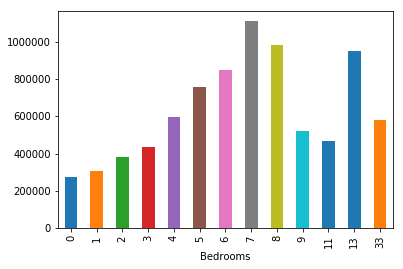

In [19]:
housePrices_small.groupby("Bedrooms")["SalePrice"].mean().plot(kind="bar",x="Bedrooms",y="SalePrice")

Seems Price increase till a point and after some point it seems that prices go down

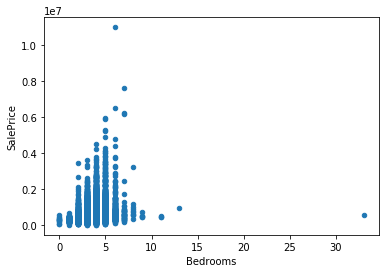

In [20]:
housePrices_small.plot(kind="scatter",x="Bedrooms",y="SalePrice")

In [21]:
housePrices_small=housePrices_small[housePrices_small['SalePrice']<1e7]

In [22]:
housePrices_small[housePrices_small['Bedrooms']>30]

,SalePrice,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot
7277,581000,33,1.75,1620,6000


In [23]:
housePrices_small=housePrices_small[housePrices_small['Bedrooms']<30]

Now lets try running the linear regression after removing the undesired data points

In [24]:
## Step 3: Run the Linear Regression Model
lr = LinearRegression()
lrModel = lr.fit(X_train, y_train)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

Coefficients: [[-6.50067328e+04  1.45000073e+04  2.81776745e+02 -6.17006466e-02]]
Intercept: [101952.61463677]


In [25]:
y_pred = lrModel.predict(X_test)
y_pred=np.reshape(y_pred, (-1, 1))
y_test=np.reshape(y_test, (-1, 1))
print(y_pred.shape)
print(y_test.shape)

(5413, 1)
(5413, 1)


In [26]:
(1-np.mean(np.abs((y_test - y_pred) / y_test))) * 100

SalePrice    68.273272
dtype: float64

Lets do the same plot but for bathrooms

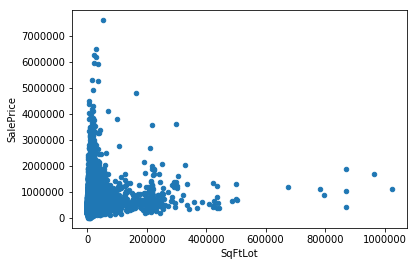

In [27]:
housePrices_small.plot(kind="scatter",x="SqFtLot",y="SalePrice")

## I feel that the data above 600000 sqFtLot is wrong entry data

In [28]:
housePrices_small=housePrices_small[housePrices_small['SqFtLot']<600000]

In [29]:
## Step 3: Run the Linear Regression Model
lr = LinearRegression()
lrModel = lr.fit(X_train, y_train)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

Coefficients: [[-6.50067328e+04  1.45000073e+04  2.81776745e+02 -6.17006466e-02]]
Intercept: [101952.61463677]


In [30]:
(1-np.mean(np.abs((y_test - y_pred) / y_test))) * 100

SalePrice    68.273272
dtype: float64

In [31]:
Var_Corr = housePrices_small.corr()

In [32]:
Var_Corr

,SalePrice,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot
SalePrice,1.000000,0.328572,0.518597,0.688042,0.147365
Bedrooms,0.328572,1.000000,0.546757,0.632361,0.091930
Bathrooms,0.518597,0.546757,1.000000,0.749103,0.101969
SqFtTotLiving,0.688042,0.632361,0.749103,1.000000,0.214506
SqFtLot,0.147365,0.091930,0.101969,0.214506,1.000000


In [33]:
housePrices_small.dtypes

SalePrice          int64
Bedrooms           int64
Bathrooms        float64
SqFtTotLiving      int64
SqFtLot            int64
dtype: object

# Let us now try to look at correlation

In [34]:
housePrices.corr()

,DocumentID,SalePrice,PropertyID,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
DocumentID,1.000000,-0.023166,0.993277,-0.020449,-0.020449,-0.020585,-0.015389,-0.112888,-0.017379,-0.029568,-0.005964,-0.028621,-0.009246,0.028971,-0.012341,-0.036455,-0.030997,-0.014634,-0.007533,0.045344
SalePrice,-0.023166,1.000000,-0.024222,0.115342,0.115342,0.984790,0.020504,0.142038,0.682573,0.293901,0.515982,0.319765,0.664689,0.077967,0.093977,-0.014798,0.793699,0.807906,-0.024741,0.040252
PropertyID,0.993277,-0.024222,1.000000,-0.020731,-0.020731,-0.021630,-0.013783,-0.108976,-0.017396,-0.031098,-0.005495,-0.028879,-0.009669,0.029914,-0.010628,-0.035761,-0.033191,-0.015034,-0.011188,0.045747
zhvi_px,-0.020449,0.115342,-0.020731,1.000000,1.000000,-0.030340,0.017053,-0.003545,-0.009021,0.018662,-0.032703,0.000251,-0.036248,-0.058438,0.007995,0.013361,-0.001911,-0.019615,0.087859,-0.017956
zhvi_idx,-0.020449,0.115342,-0.020731,1.000000,1.000000,-0.030340,0.017053,-0.003545,-0.009021,0.018662,-0.032703,0.000251,-0.036248,-0.058438,0.007995,0.013361,-0.001911,-0.019615,0.087859,-0.017956
AdjSalePrice,-0.020585,0.984790,-0.021630,-0.030340,-0.030340,1.000000,0.018985,0.144055,0.687768,0.294136,0.522496,0.321223,0.673531,0.083044,0.094973,-0.016053,0.800715,0.816298,-0.034186,0.039117
NbrLivingUnits,-0.015389,0.020504,-0.013783,0.017053,0.017053,0.018985,1.000000,-0.000383,0.053807,0.064607,0.099371,0.161298,-0.051079,-0.112521,0.014113,0.078082,0.032550,-0.003819,0.036733,-0.049338
SqFtLot,-0.112888,0.142038,-0.108976,-0.003545,-0.003545,0.144055,-0.000383,1.000000,0.207260,0.046500,0.103723,0.079361,0.143849,0.031138,0.011427,-0.014428,0.084550,0.111271,0.060486,-0.087082
SqFtTotLiving,-0.017379,0.682573,-0.017396,-0.009021,-0.009021,0.687768,0.053807,0.207260,1.000000,0.388464,0.749759,0.618345,0.761665,0.296035,0.048224,-0.068404,0.471810,0.758407,-0.103901,0.110220
SqFtFinBasement,-0.029568,0.293901,-0.031098,0.018662,0.018662,0.294136,0.064607,0.046500,0.388464,1.000000,0.257881,0.295425,0.135352,-0.220999,0.111682,0.047879,0.286770,0.275380,0.095527,-0.137837


In [35]:
type(housePrices[['SalePrice']])

pandas.core.frame.DataFrame

In [36]:
from sklearn.model_selection import train_test_split
y = housePrices['SalePrice']
df = housePrices[["AdjSalePrice"]]
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [37]:
lr = LinearRegression()
lrModel = lr.fit(X_train, y_train)

In [38]:
y_pred = lrModel.predict(X_test)

In [39]:
y_test.shape

(5413,)

In [40]:
y_pred=np.reshape(y_pred, (-1, 1))
y_test=np.reshape(y_test, (-1, 1))

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [41]:
(1-np.mean(np.abs((y_test - y_pred) / y_test))) * 100

91.74512789109845

# Add more correlated columns and run *Random Forest*

In [42]:
from sklearn.model_selection import train_test_split
y = housePrices[["SalePrice"]]
df = housePrices[["SqFtTotLiving", "SqFtLot","AdjSalePrice","BldgGrade","ImpsVal","LandVal"]]
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators= 300, random_state=0)
lrModel = regressor.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [44]:
y_pred = regressor.predict(X_test)

In [45]:
y_pred=np.reshape(y_pred, (-1, 1))
y_test=np.reshape(y_test, (-1, 1))

In [46]:
(1-np.mean(np.abs((y_test - y_pred) / y_test))) * 100

SalePrice    91.87039
dtype: float64

# Correlation doesnt mean causation. 

Here, there is very high coorelation between *AdjSalePrice* and *SalePrice*. However, *AdjSalePrice* is the cause for having high *SalePrice*. So, We should probably ignore it.

In [ ]:
from sklearn.model_selection import train_test_split
y = housePrices[["SalePrice"]]
df = housePrices[["SqFtTotLiving", "SqFtLot","BldgGrade","ImpsVal","LandVal"]]
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [ ]:
regressor = RandomForestRegressor(n_estimators= 300, random_state=0)
lrModel = regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred=np.reshape(y_pred, (-1, 1))
y_test=np.reshape(y_test, (-1, 1))

In [ ]:
(1-np.mean(np.abs((y_test - y_pred) / y_test))) * 100

We got 81.7% accuracy. 

# Now, lets see what other columns can be added. Do a PCA and Random Forest on top of it

In [ ]:
def factorize_categorical_columns(dataset, categorical_columns):
    for column_name in categorical_columns:
        if str(dataset[column_name].dtype) == 'object':
            dataset[column_name] = dataset[column_name].factorize()[0]
    return dataset

In [ ]:
housePrices.columns

In [ ]:
categorical_columns = ['PropertyType','BldgGrade','ZipCode','NewConstruction','TrafficNoise']
continuous_columns=["SqFtTotLiving", "SqFtLot","BldgGrade","ImpsVal","LandVal","NbrLivingUnits",'SqFtFinBasement','Bathrooms','Bedrooms']

In [ ]:
housePrices_factorised=factorize_categorical_columns(housePrices,categorical_columns)

In [ ]:
independentVariables=categorical_columns+continuous_columns

In [ ]:
len(independentVariables)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree = 4)
X = polynomial_features.fit_transform(housePrices_factorised[independentVariables])

In [ ]:
X.shape

In [ ]:
y = housePrices_factorised[["SalePrice"]]
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
explained_variance_ratio

In [ ]:
regressor = RandomForestRegressor(n_estimators= 300, random_state=0)
lrModel = regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred=np.reshape(y_pred, (-1, 1))
y_test=np.reshape(y_test, (-1, 1))

In [ ]:
(1-np.mean(np.abs((y_test - y_pred) / y_test))) * 100

With PCA on to of polynomial features, we got around **82.43%**

# Lets try Neural Network without *AdjustedSalePrice* using *FastAI* over *PyTorch*

In [ ]:
from fastai.tabular import *

In [ ]:
dep_var = 'SalePrice'
cat_names = [ 'PropertyType','ZipCode','NewConstruction','TrafficNoise']

cont_names = ['NbrLivingUnits', 'SqFtLot',

       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',

       'BldgGrade', 'YrBuilt', 'YrRenovated', 'LandVal',

       'ImpsVal']

procs = [FillMissing, Categorify, Normalize]

In [ ]:
test = TabularList.from_df(housePrices.iloc[800:1000].copy(), cat_names=cat_names, cont_names=cont_names)

In [ ]:
# test.databunch

In [ ]:
data = (TabularList.from_df(housePrices, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var,label_cls=FloatList)
                           .add_test(test)
                           .databunch())

In [ ]:
data.show_batch(rows=10)

In [ ]:
learn = tabular_learner(data, layers=[200,100], metrics=mean_absolute_error)

In [ ]:
learn.loss_fn = F.mse_loss


In [ ]:
learn.fit(10, 1e-1)

In [ ]:
learn.fit(10, 1e-1)

In [ ]:
learn.fit(10, 1e-2)

In [ ]:
learn.fit(10, 3e-3)

In [ ]:
learn.fit(10, 1e-2)

In [ ]:
learn.fit(10, 3e-3)

In [ ]:
learn.fit(10, 3e-4)

In [ ]:
learn.fit(10, 1e-4)

In [ ]:
learn.fit(10, 9e-5)

In [ ]:
learn.fit(10, 3e-5)

So, on an average, our new model would predict the housing price with a **+- $77967** accuracy. 